### 최종 실습 프로젝트
- ecommerce_sales_data.csv 파일 활용

당신은 한 온라인 쇼핑몰의 데이터 분석가로 고용되었다. 쇼핑몰의 판매 데이터를 분석하여 고객의 구매 패턴을 파악하고, 중요한 인사이트를 도출하는 것이 이번 프로젝트의 목표다. 이를 통해 향후 마케팅 전략을 제시하고자 한다. ecommerce_sales_data.csv 파일을 통해 주어진 데이터는 고객의 주문 기록, 상품 정보, 판매 데이터 등을 포함하고 있다. 주어진 데이터를 분석하여 아래의 질문에 답하라.

- **데이터 설명**:
    - **OrderID**: 주문 ID
    - **Product**: 주문한 상품 이름
    - **Category**: 상품의 카테고리 (예: Electronics, Clothing 등)
    - **Quantity**: 주문 수량
    - **Price**: 상품의 가격
    - **CustomerID**: 고객 ID
    - **BirthDate**: 고객 생일
    - **OrderDate**: 주문 날짜
    - **Country**: 주문한 고객의 국가

1. **데이터 탐색 및 전처리**
    1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.
    2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.
    3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.

In [61]:
import numpy as np
import pandas as pd
df = pd.read_csv('./data/ecommerce_sales_data.csv')
df.head()

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18,미국
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45,독일
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19,중국
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 2:19,일본
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34,대한민국


In [62]:
df['Price'] = df['Price'].fillna(df['Price'].mean())
df['Country'] = df['Country'].fillna('Unkonwn')
df['Quantity'] = df['Quantity'].fillna(0)

df.isnull().sum()

OrderID       0
Product       0
Category      0
Quantity      0
Price         0
CustomerID    0
Birthdate     0
OrderDate     0
Country       0
dtype: int64

In [63]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
print(df.dtypes)

OrderID                int64
Product               object
Category              object
Quantity               int64
Price                  int64
CustomerID             int64
Birthdate             object
OrderDate     datetime64[ns]
Country               object
dtype: object


2. **매출 분석**
    1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
        - 매출액 = `Quantity` * `Price`
    2. 월별 총 매출액을 집계하여 시각화하세요.
        - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
    3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
    4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.

C:\Users\ljh10\AppData\Local\Temp\ipykernel_57332\1070727615.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_price = df.resample('M', on='OrderDate').sum()


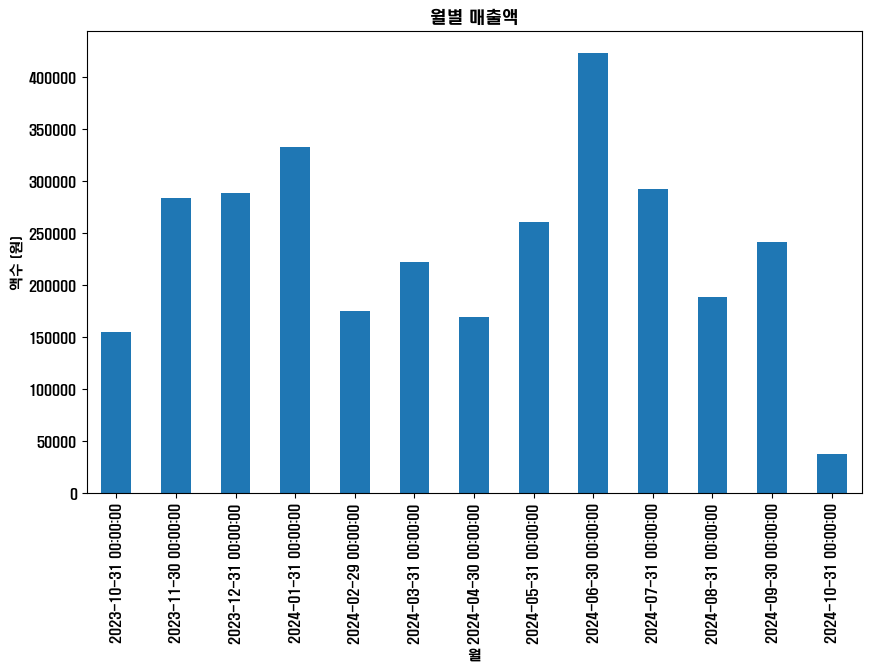

In [64]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:\\Windows\\Fonts\\H2HDRM.TTF'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

df['TotalRevenue'] = df['Quantity'] + df['Price']

df['OrderDate'] = pd.to_datetime(df['OrderDate'])

monthly_price = df.resample('M', on='OrderDate').sum()

plt.figure(figsize=(10,6))
monthly_price['TotalRevenue'].plot(kind='bar')

plt.title('월별 매출액')
plt.xlabel('월')
plt.ylabel('액수 (원)')



plt.show()

In [65]:
ctr = df.groupby('Category')['TotalRevenue'].sum()

top_ctr = ctr.nlargest(3)
top_ctr

Category
Food           655068
Electronics    553060
Beauty         538063
Name: TotalRevenue, dtype: int64

In [66]:
nationa_price = df.groupby('Country')['TotalRevenue'].sum()
nationa_price

Country
대한민국    505052
독일      693071
미국      692078
일본      538067
중국      647085
Name: TotalRevenue, dtype: int64

3. **고객 분석**
    1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
    2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
    3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
        - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.

In [67]:
cus = df.groupby('CustomerID')['TotalRevenue'].sum()
print(cus, '\n')
most_cus = cus.nlargest(5)
print(most_cus)

CustomerID
1007    80008
1029    33005
1034    49001
1038    79004
1039    46003
        ...  
1947    34004
1951    48001
1963    33005
1967    25004
1982    50003
Name: TotalRevenue, Length: 111, dtype: int64 

CustomerID
1496    88002
1007    80008
1038    79004
1141    73006
1508    59002
Name: TotalRevenue, dtype: int64


In [68]:
cus_cnt = df['CustomerID'].value_counts()

print(cus_cnt, '\n')

most_cus = cus_cnt.nlargest(5)

print(most_cus)

CustomerID
1206    2
1278    2
1496    2
1007    2
1673    2
       ..
1372    1
1645    1
1433    1
1497    1
1951    1
Name: count, Length: 111, dtype: int64 

CustomerID
1206    2
1278    2
1496    2
1007    2
1673    2
Name: count, dtype: int64


In [69]:
df['Birthdate'] = pd.to_datetime(df['Birthdate'])
df['Year'] = df['Birthdate'].dt.year

df['avg_age'] = ((2025-df['Year'])//10)*10 # 나머지없이 계산후 10대로 끊기

df_id = df.groupby(['avg_age','Category'])['OrderID'].count()
df_ctr = df_id.groupby('avg_age').idxmax()
df_ctr


avg_age
20         (20, Beauty)
30           (30, Food)
40          (40, Books)
50    (50, Electronics)
60    (60, Electronics)
Name: OrderID, dtype: object

4. **상품 분석**
    1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.
    2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.
    3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.

In [70]:
df_qt = df.groupby(['Category','Product'])['Quantity'].sum()
df_ctr = df_qt.groupby('Category').idxmax()
df_ctr

Category
Beauty              (Beauty, 립스틱)
Books                 (Books, 소설)
Clothing           (Clothing, 셔츠)
Electronics    (Electronics, 노트북)
Food                   (Food, 커피)
Sports             (Sports, 요가매트)
Name: Quantity, dtype: object

In [71]:
df_pd = df.groupby('Product')['Quantity'].mean()
df_pd = df_pd.sort_values(ascending=False)
df_pd.head()

Product
주스      5.0
자기계발    5.0
요가매트    4.0
커피      4.0
향수      3.6
Name: Quantity, dtype: float64

5. **시간 분석**
    1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.
    2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.
    3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.

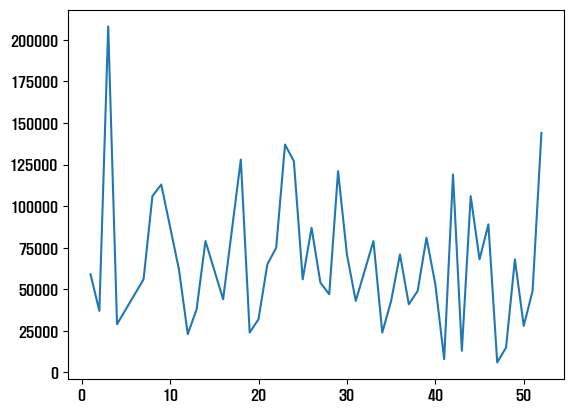

In [75]:
df['OrderWeek'] = df['OrderDate'].dt.isocalendar().week
df_ow = df.groupby('OrderWeek')['TotalRevenue'].sum()
plt.plot(df_ow)

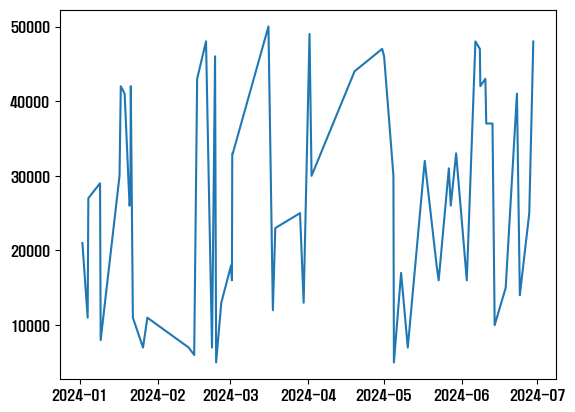

In [76]:
df_sp_day = df[(df['OrderDate'] >= '2024-01-01') & (df['OrderDate'] <= '2024-06-30')]
df_pr = df_sp_day.groupby('OrderDate')['TotalRevenue'].sum()
df_pr = df_pr.sort_index()

plt.plot(df_pr)

6. **추가 분석**
    1. 고객의 **재구매율**을 분석하세요.
        - 재구매율 = 한 고객이 여러 번 주문한 비율
    2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.